In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Activation, PReLU, LeakyReLU, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid, softmax, relu, tanh

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [2]:
def figure(History, legend):
  ####################### PLOT TRAINING VS VALIDATION ######################
  ########## Accuracy ###########
  acc = History.history['acc']
  val_acc = History.history['val_acc']
  loss = History.history['loss']
  val_loss = History.history['val_loss']

  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.grid()
  plt.show()

  ########## Loss ###########
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  try:
    loss_no_reg = History.history['categorical_crossentropy']
    val_loss_no_reg = History.history['val_categorical_crossentropy']
    plt.plot(loss_no_reg)
    plt.plot(val_loss_no_reg)
    plt.legend(legend + [legend[0]+' sin reg', legend[1]+' sin reg'], loc='upper left')
  except:
    plt.legend(legend, loc='upper left')

  plt.grid()
  plt.show()

In [3]:
# load dataset
(TRAIN_x_orig, TRAIN_y), (test_x_orig, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Dimensiones de los conjuntos de ENTRENAMIENTO y prueba
print ("TRAIN_x_orig shape: " + str(TRAIN_x_orig.shape))
print ("TRAIN_y shape: " + str(TRAIN_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

TRAIN_x_orig shape: (60000, 28, 28)
TRAIN_y shape: (60000,)
test_x_orig shape: (10000, 28, 28)
test_y shape: (10000,)


Text(0.5, 1.0, '1')

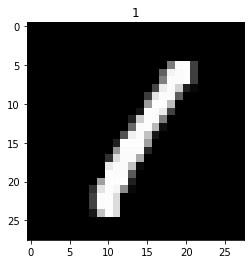

In [5]:
# Ejemplo de una imagen
index = 3
plt.imshow(TRAIN_x_orig[index], cmap='gray')
plt.title(TRAIN_y[index])

In [6]:
# Aplanamiento de la imagen
TRAIN_x_expand = np.expand_dims(TRAIN_x_orig, axis=-1)
test_x_expand =  np.expand_dims(test_x_orig, axis=-1)

print ("TRAIN_x_expand shape: " + str(TRAIN_x_expand.shape))
print ("TRAIN_y shape: " + str(TRAIN_y.shape))
print ("test_x_expand shape: " + str(test_x_expand.shape))
print ("test_y shape: " + str(test_y.shape))


TRAIN_x_expand shape: (60000, 28, 28, 1)
TRAIN_y shape: (60000,)
test_x_expand shape: (10000, 28, 28, 1)
test_y shape: (10000,)


In [7]:
for i in range(10):
  print(i,' :', np.sum(TRAIN_y==i))

0  : 5923
1  : 6742
2  : 5958
3  : 6131
4  : 5842
5  : 5421
6  : 5918
7  : 6265
8  : 5851
9  : 5949


In [8]:
# Escalamiento de los datos
TRAIN_x = TRAIN_x_expand/255.
test_x = test_x_expand/255.


In [9]:
# Segmentación en entrenamiento y validación
train_x, valid_x, train_y, valid_y = train_test_split(TRAIN_x, TRAIN_y, test_size=1/6, random_state=42)


In [10]:
# Resumen de dimensiones
print ("TRAIN_x shape: " + str(TRAIN_x.shape))
print ("TRAIN_y shape: " + str(TRAIN_y.shape))
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("valid_x shape: " + str(valid_x.shape))
print ("valid_y shape: " + str(valid_y.shape))
print ("test_x shape:  " + str(test_x.shape))
print ("test_y shape:  " + str(test_y.shape))

TRAIN_x shape: (60000, 28, 28, 1)
TRAIN_y shape: (60000,)
train_x shape: (50000, 28, 28, 1)
train_y shape: (50000,)
valid_x shape: (10000, 28, 28, 1)
valid_y shape: (10000,)
test_x shape:  (10000, 28, 28, 1)
test_y shape:  (10000,)


In [11]:
#Converts a class vector
TRAIN_y_cat = to_categorical(TRAIN_y)
train_y_cat = to_categorical(train_y)
valid_y_cat = to_categorical(valid_y)
test_y_cat = to_categorical(test_y)

print ("TRAIN_y_cat shape: " + str(TRAIN_y_cat.shape))
print ("train_y_cat shape: " + str(train_y_cat.shape))
print ("valid_y_cat shape: " + str(valid_y_cat.shape))
print ("test_y_cat shape:  " + str(test_y_cat.shape))

TRAIN_y_cat shape: (60000, 10)
train_y_cat shape: (50000, 10)
valid_y_cat shape: (10000, 10)
test_y_cat shape:  (10000, 10)


In [12]:
# Creación del modelo
model = Sequential([
                    Conv2D(64, 3, strides=(1, 1), padding='same', input_shape = train_x.shape[1:]),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    Conv2D(32, 3, strides=(1, 1), padding='same' ),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(32, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    Conv2D(32, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(16, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    Conv2D(16, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dropout(0.25),
                    Dense(units=10, activation=softmax)
                    ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

In [14]:
#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#    lambda epoch: 1e-6 * 10**(epoch / 20))

In [15]:
# Definición del optimizador, función de pérdidas y métricas
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss= tf.keras.losses.CategoricalCrossentropy(),metrics='acc')
# Ajuste de pesos
#history_lr = model.fit(train_x, train_y_cat, epochs=100, batch_size=256, validation_data= (valid_x, valid_y_cat), callbacks=[lr_schedule])


In [16]:
#plt.semilogx(history_lr.history["lr"], history_lr.history["loss"])
#plt.axis([1e-4, 1e-2, 0, 0.1])


In [17]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['acc', 'categorical_accuracy'])
# Early stopping
stopping = EarlyStopping(monitor='val_loss',min_delta=0,mode='auto',patience=5, restore_best_weights=True)
# Ajuste de pesos
History = model.fit(train_x, train_y_cat, epochs=30, batch_size=32, validation_data= (valid_x, valid_y_cat), callbacks=[stopping])


Epoch 1/30
1563/1563 [==============================] - 44s 7ms/step - loss: 0.5680 - acc: 0.8313 - categorical_accuracy: 0.8313 - val_loss: 0.0818 - val_acc: 0.9740 - val_categorical_accuracy: 0.9740
Epoch 2/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0877 - acc: 0.9725 - categorical_accuracy: 0.9725 - val_loss: 0.0558 - val_acc: 0.9827 - val_categorical_accuracy: 0.9827
Epoch 3/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0628 - acc: 0.9812 - categorical_accuracy: 0.9812 - val_loss: 0.0436 - val_acc: 0.9871 - val_categorical_accuracy: 0.9871
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0472 - acc: 0.9853 - categorical_accuracy: 0.9853 - val_loss: 0.0316 - val_acc: 0.9905 - val_categorical_accuracy: 0.9905
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0415 - acc: 0.9873 - categorical_accuracy: 0.9873 - val_loss: 0.0427 - val_acc: 0.9877 - val_categorical_accuracy: 0.

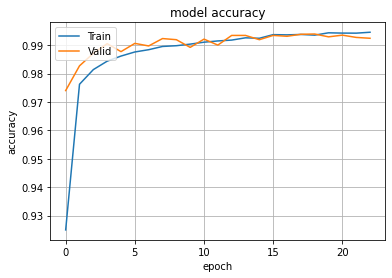

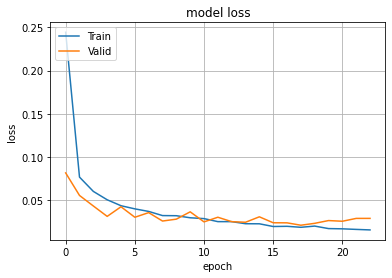

In [18]:
# Plot de curvas
figure(History,['Train', 'Valid'])

In [19]:
# Metricas
Metricas = model.evaluate(train_x, train_y_cat , verbose=0)
print('train Loss: %.4f, train Acc: %.4f' % (Metricas[0], Metricas[1]) )
Metricas = model.evaluate(valid_x, valid_y_cat , verbose=0)
print('valid Loss: %.4f, valid Acc: %.4f' % (Metricas[0], Metricas[1]) )

train Loss: 0.0063, train Acc: 0.9984
valid Loss: 0.0214, valid Acc: 0.9938


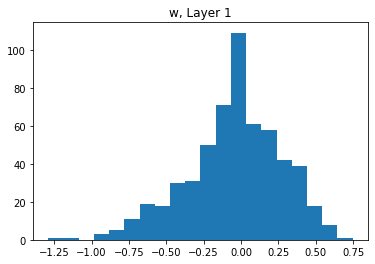

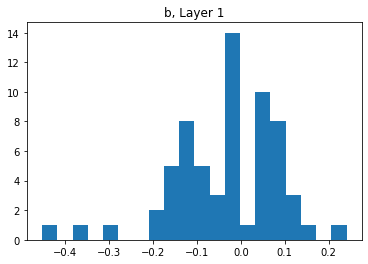

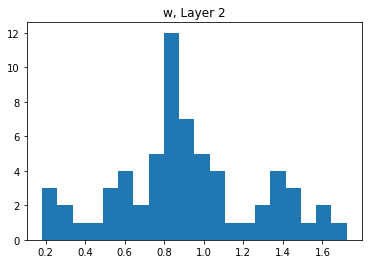

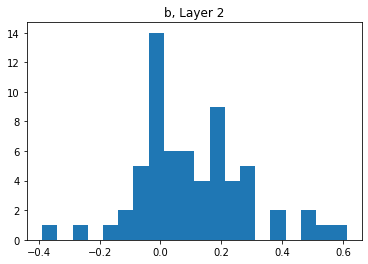

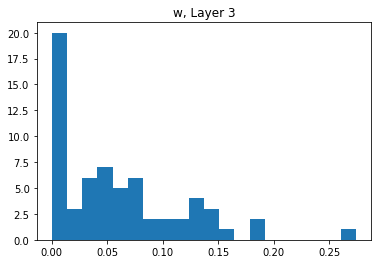

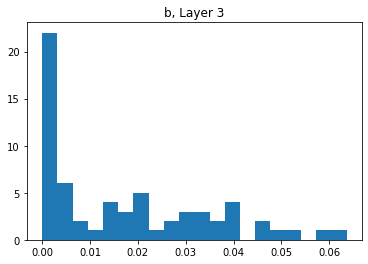

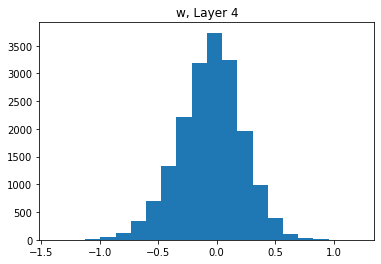

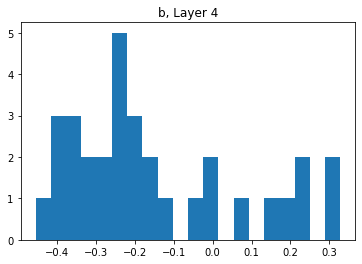

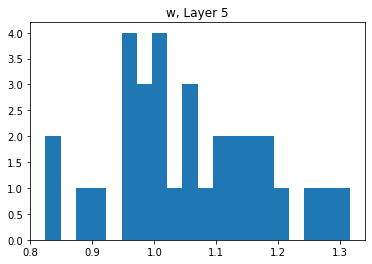

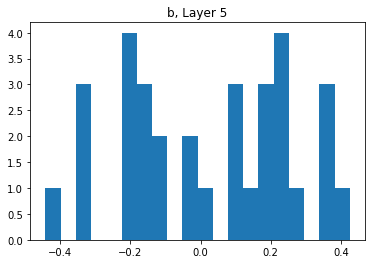

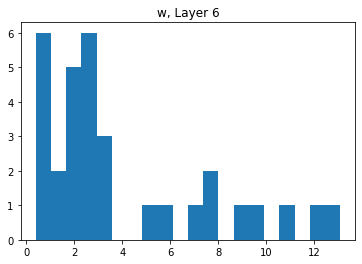

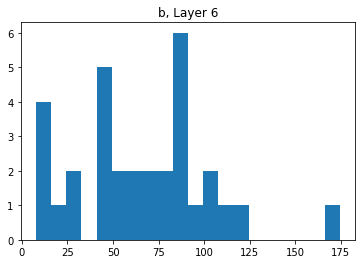

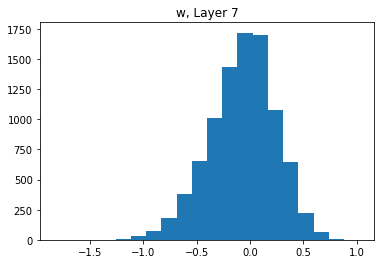

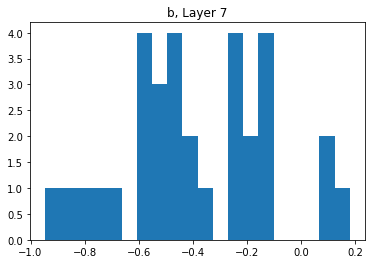

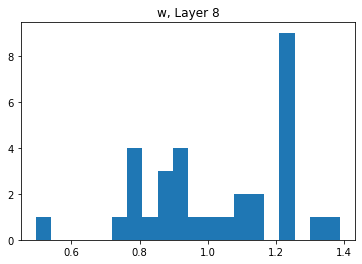

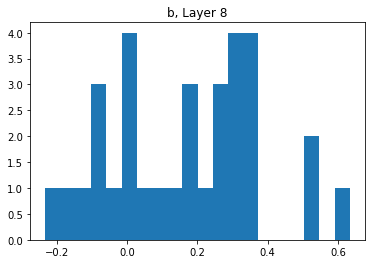

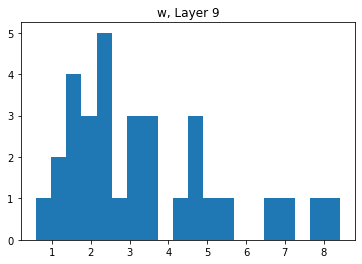

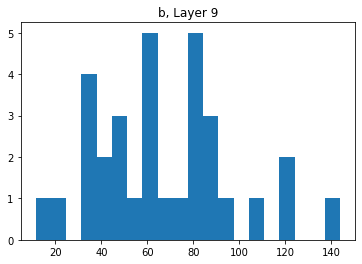

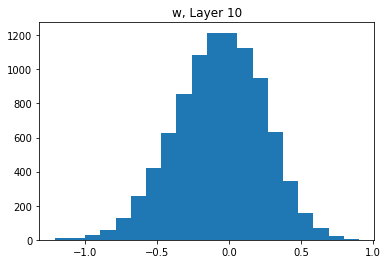

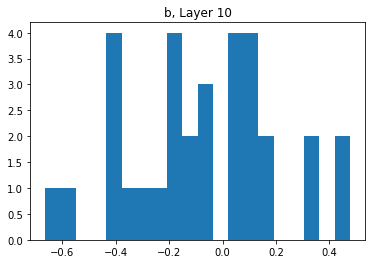

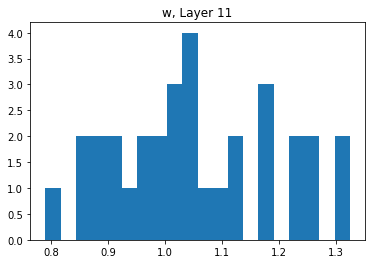

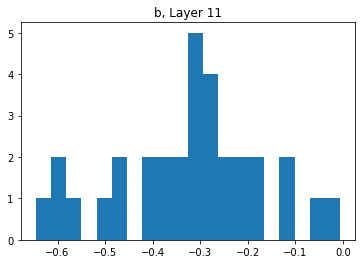

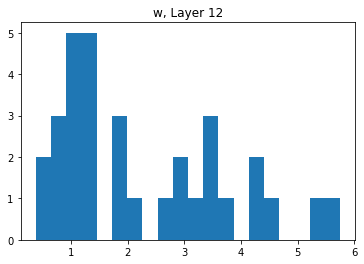

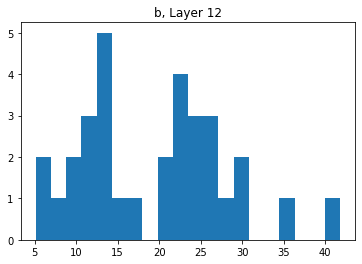

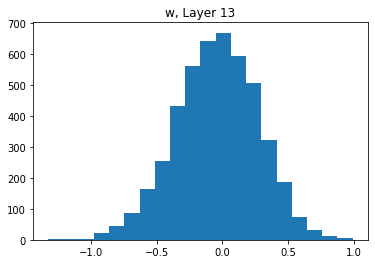

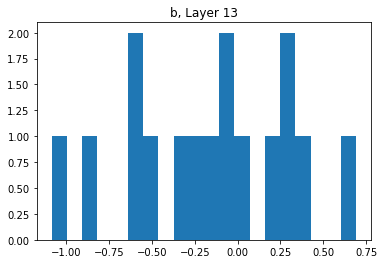

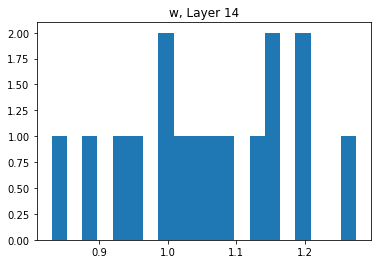

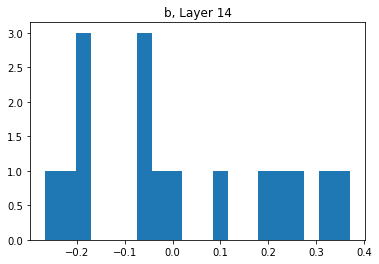

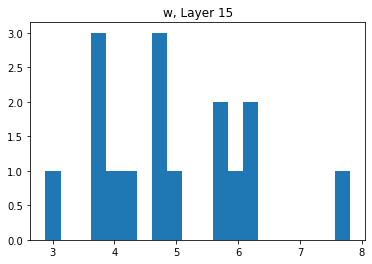

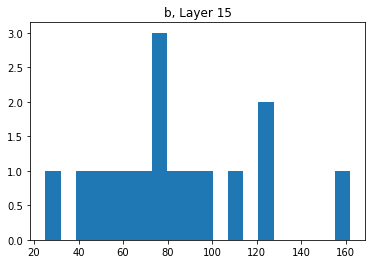

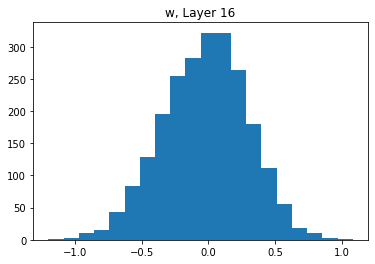

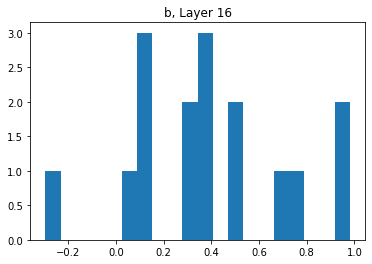

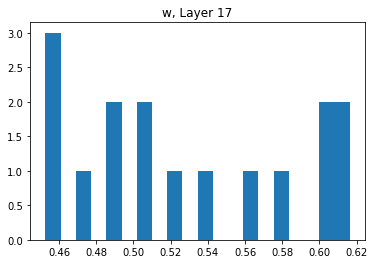

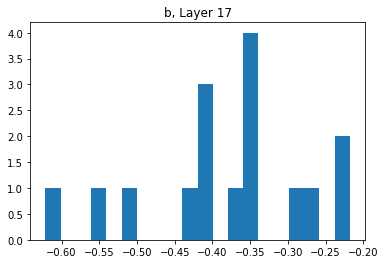

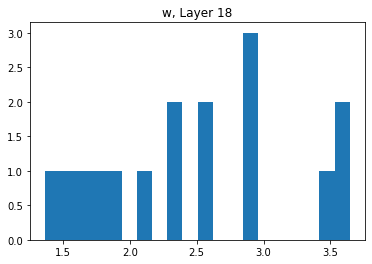

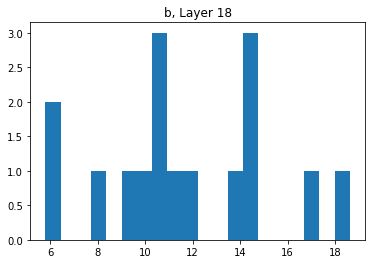

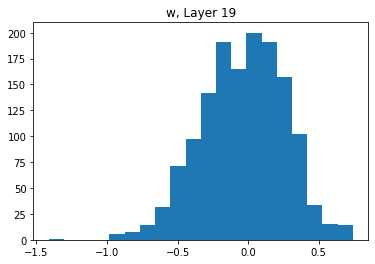

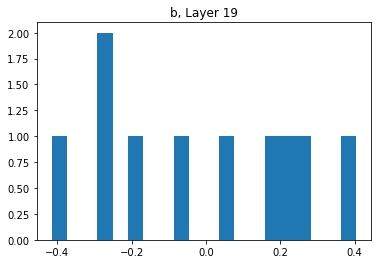

In [20]:
for i in range(len(model.get_weights())):
  _ = plt.hist(model.get_weights()[i].reshape((-1,)), bins=20)
  if i%2==0:
    plt.title('w, ' + 'Layer ' + str(i//2+1))
  else:
    plt.title('b, ' + 'Layer ' + str(i//2+1))

  plt.show()

# Test

In [21]:
# Creación del modelo
modelo_final = Sequential([
                    Conv2D(32, 3, strides=(1, 1), padding='same', input_shape = TRAIN_x.shape[1:]),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    Conv2D(32, 3, strides=(1, 1), padding='same' ),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(32, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    Conv2D(32, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(16, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    Conv2D(16, 3, strides=(1, 1), padding='same'),
                    Activation(relu),
                    BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dropout(0.25),
                    Dense(units=10, activation=softmax)
                    ])

modelo_final.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)       

In [22]:
# Definición del optimizador, función de pérdidas y métricas
modelo_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss= tf.keras.losses.CategoricalCrossentropy(),metrics='acc')
# Early stopping
stopping = EarlyStopping(monitor='val_loss',min_delta=0,mode='auto',patience=10, restore_best_weights=True)
# Ajuste de pesos
History = modelo_final.fit(TRAIN_x, TRAIN_y_cat, epochs=50, batch_size=32, callbacks=[stopping], validation_data= (test_x, test_y_cat))


Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4355 - acc: 0.8715 - val_loss: 0.0527 - val_acc: 0.9840
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0752 - acc: 0.9779 - val_loss: 0.0683 - val_acc: 0.9775
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0574 - acc: 0.9822 - val_loss: 0.0446 - val_acc: 0.9851
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0444 - acc: 0.9863 - val_loss: 0.0239 - val_acc: 0.9920
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0427 - acc: 0.9867 - val_loss: 0.0234 - val_acc: 0.9925
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0358 - acc: 0.9875 - val_loss: 0.0167 - val_acc: 0.9951
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0300 - acc: 0.9903 - val_loss: 0.0174 - val_acc: 0.9951
Epoch 8/50
1875/1875 [==============================] -

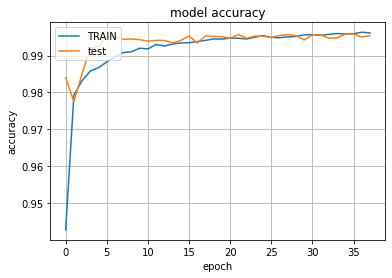

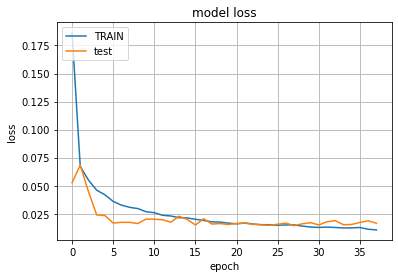

In [23]:
figure(History,['TRAIN', 'test'])

In [24]:
# Metricas
Metricas = modelo_final.evaluate(TRAIN_x, TRAIN_y_cat , verbose=0)
print('TRAIN Loss: %.4f, TRAIN Acc: %.4f' % (Metricas[0], Metricas[1]) )
Metricas = modelo_final.evaluate(test_x, test_y_cat , verbose=0)
print('test Loss: %.4f, test Acc: %.4f' % (Metricas[0], Metricas[1]) )

TRAIN Loss: 0.0037, TRAIN Acc: 0.9991
test Loss: 0.0144, test Acc: 0.9957


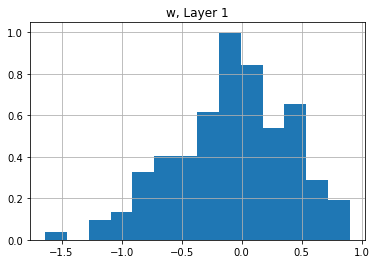

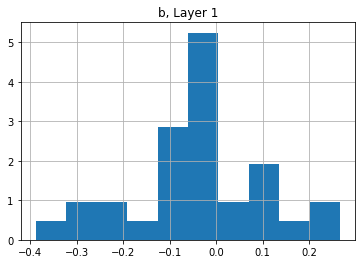

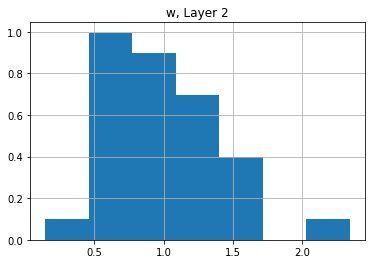

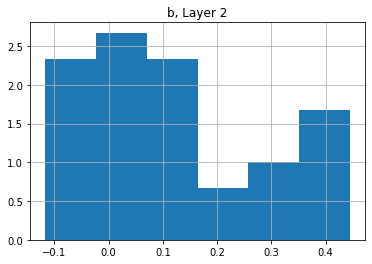

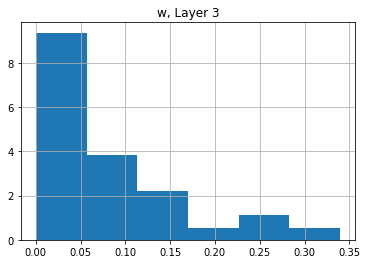

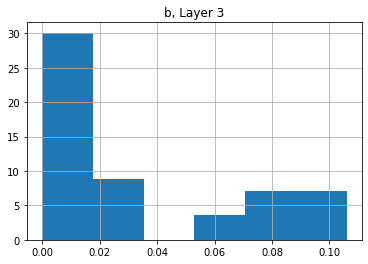

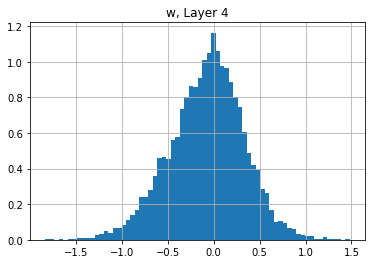

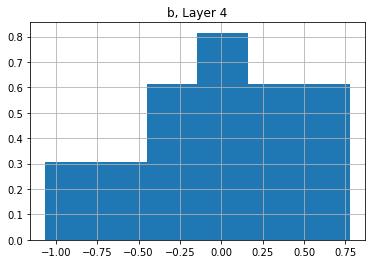

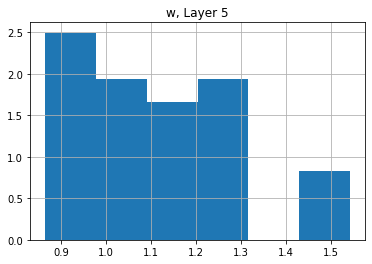

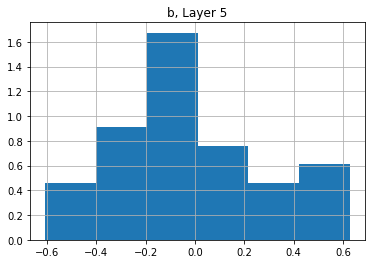

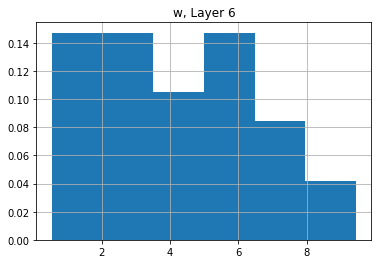

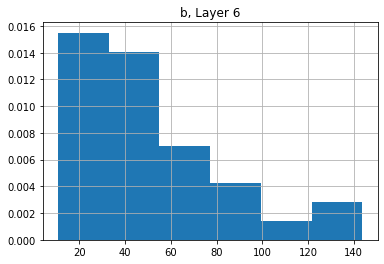

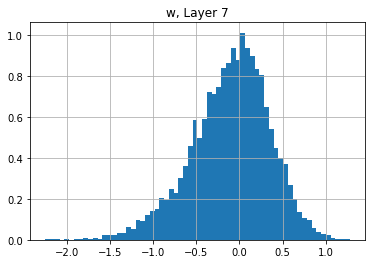

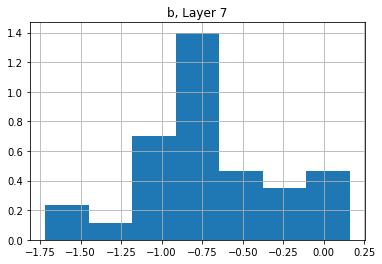

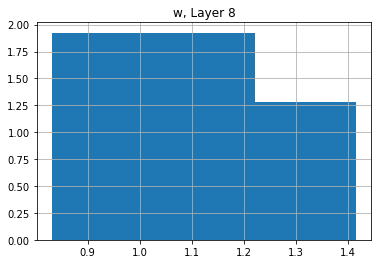

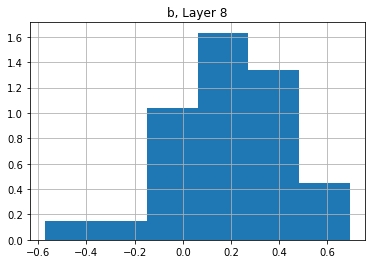

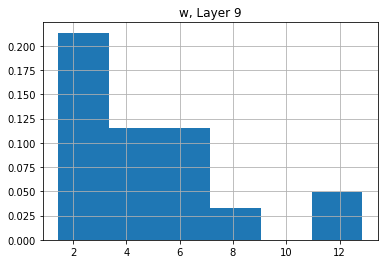

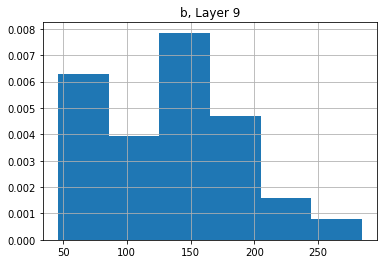

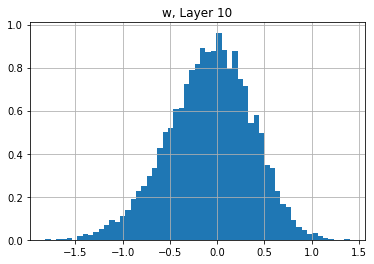

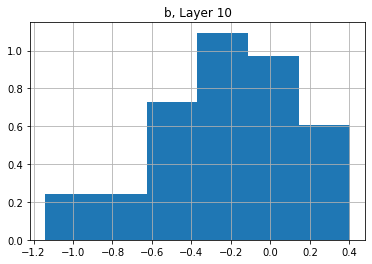

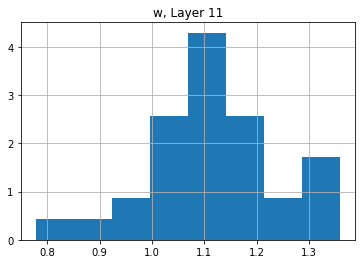

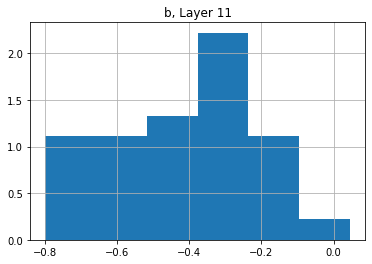

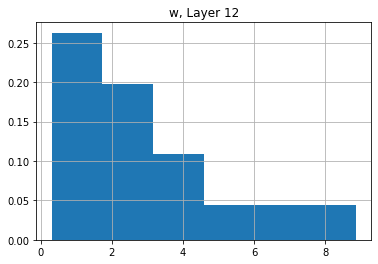

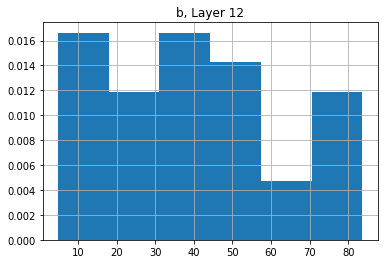

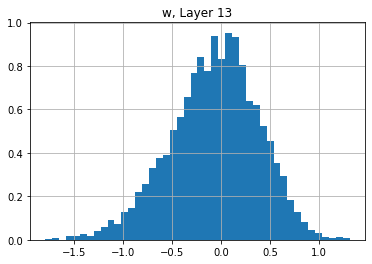

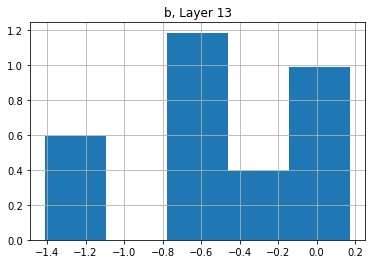

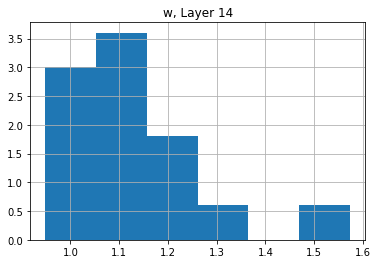

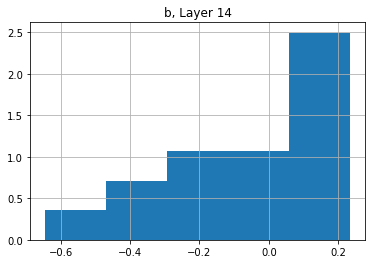

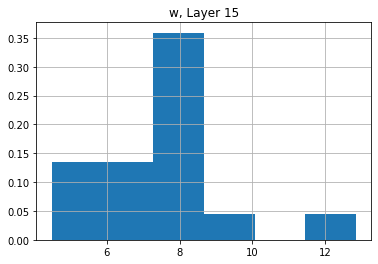

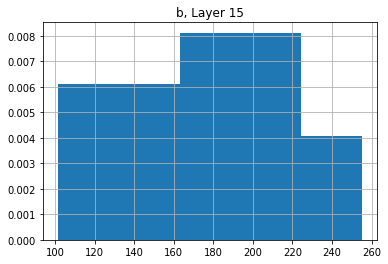

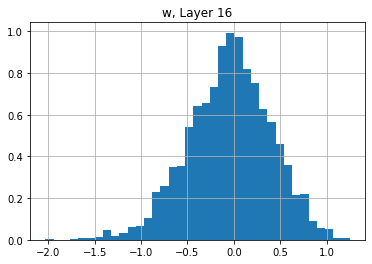

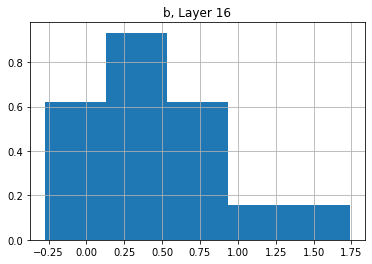

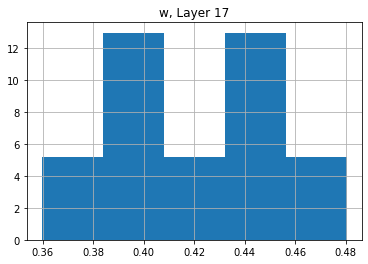

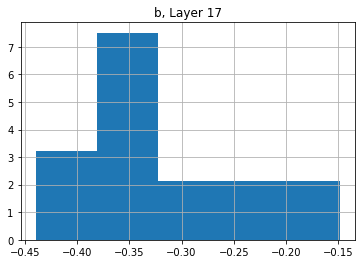

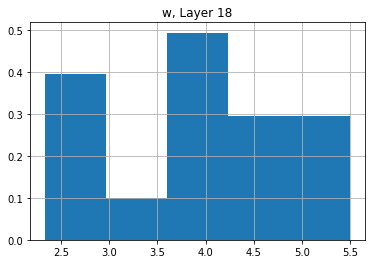

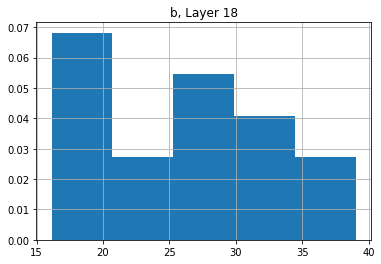

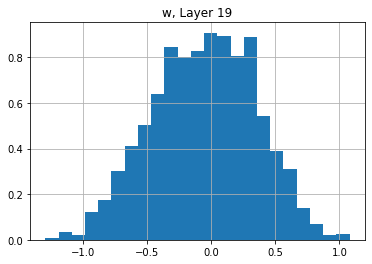

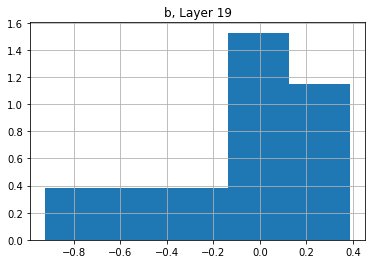

In [25]:
for i in range(len(modelo_final.get_weights())):
  _ = plt.hist(modelo_final.get_weights()[i].reshape((-1,)), bins='auto', density = True)
  #plt.ylim((0,10))
  if i%2==0:
    plt.title('w, ' + 'Layer ' + str(i//2+1))
  else:
    plt.title('b, ' + 'Layer ' + str(i//2+1))
  plt.grid()
  plt.show()


# Visualizar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


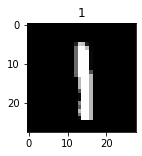

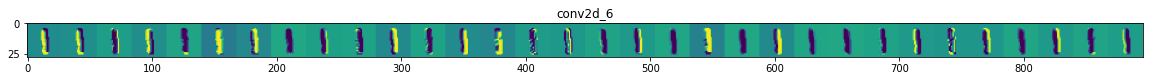

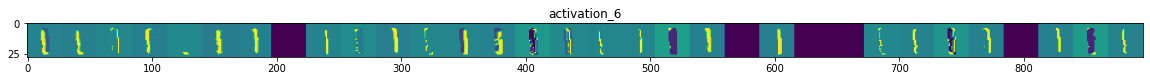

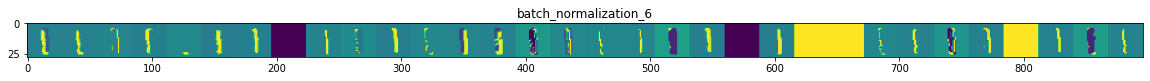

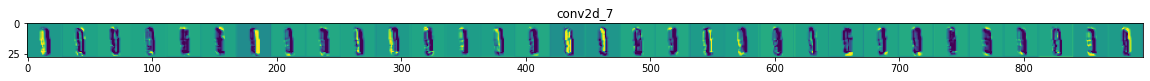

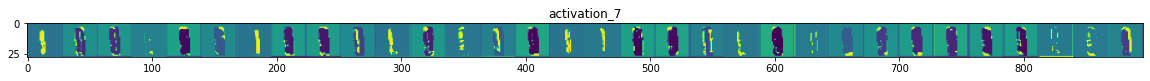

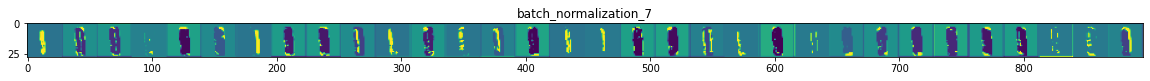

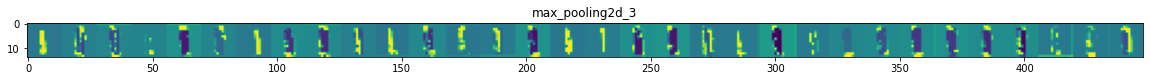

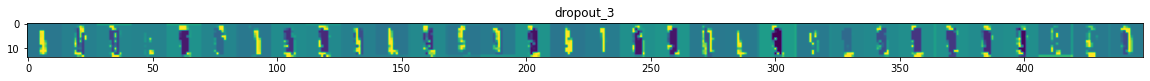

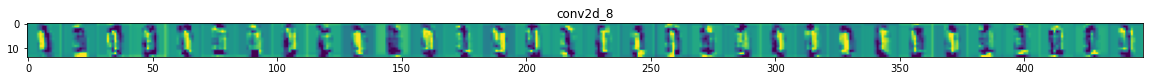

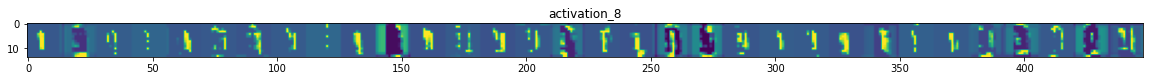

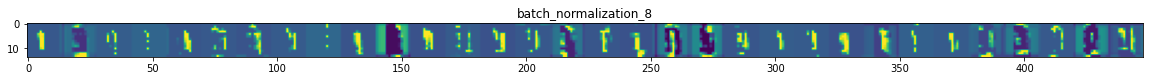

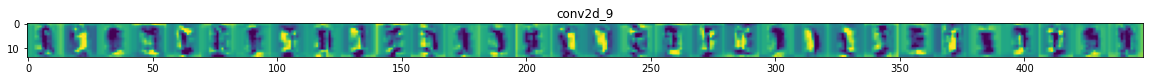

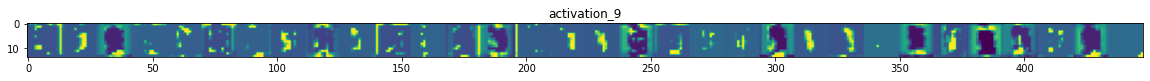

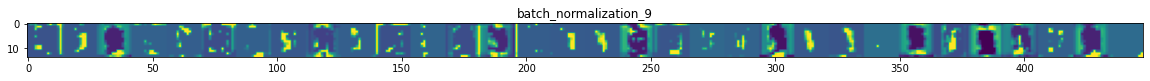

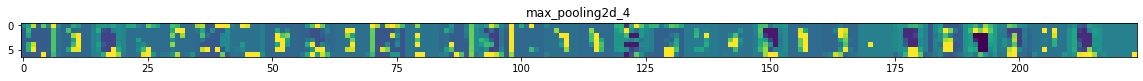

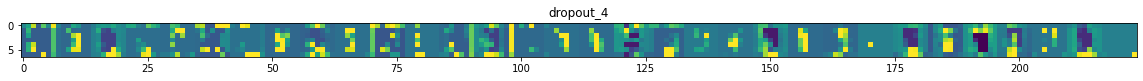

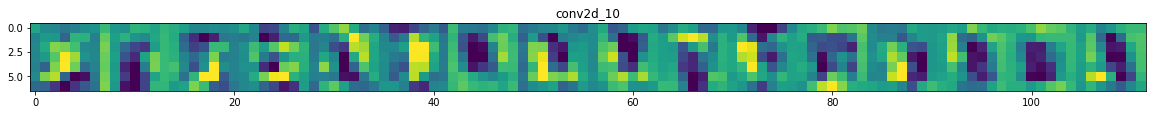

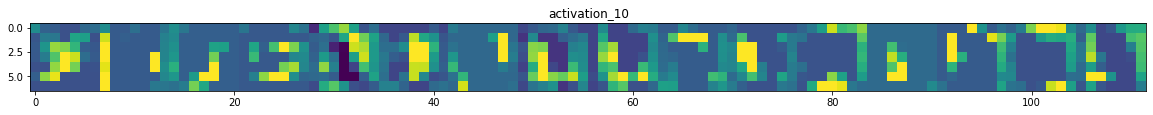

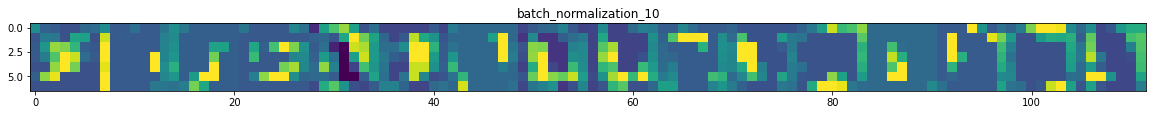

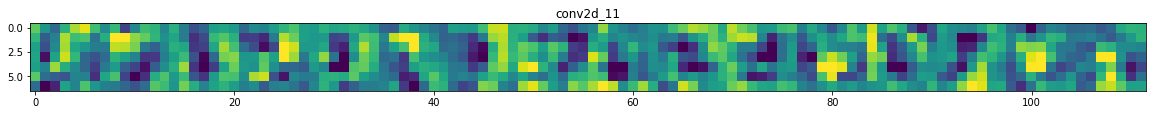

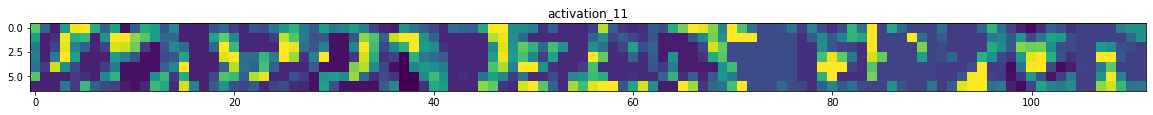

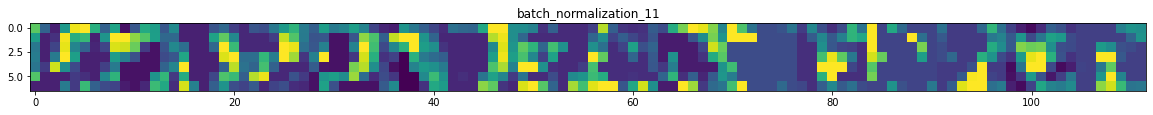

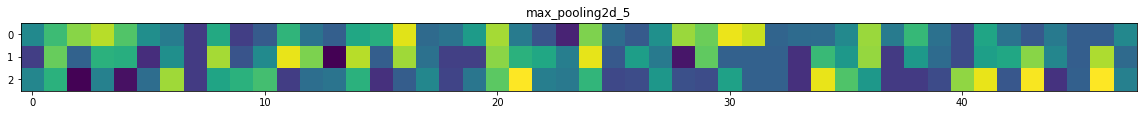

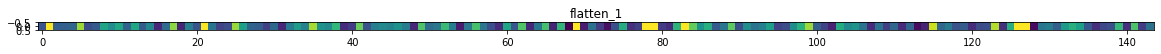

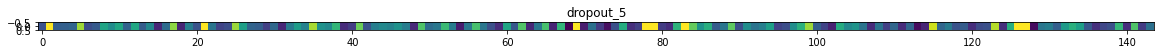

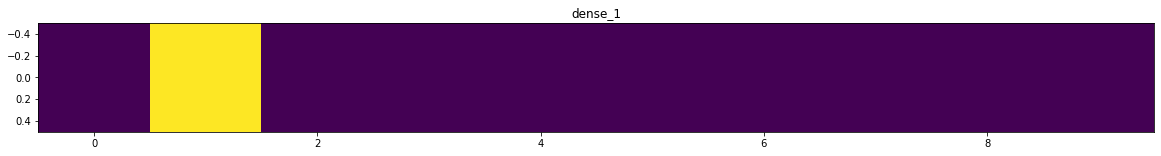

In [27]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in modelo_final.layers]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = modelo_final.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
#indexs = np.argmax(modelo_final.predict(test_x), axis=-1) != test_y
indexs = range(len(test_y))

datos = test_x[indexs]
etiquetas = test_y[indexs]

index = random.choice(range(len(datos)))
x = datos[index]
y = etiquetas[index]

plt.figure(figsize=(2, 2))
plt.imshow(x[:,:,0], cmap='gray')
plt.title(y)

x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)


# Rescale by 1/255
#x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in modelo_final.layers[0:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

  else:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = 1#feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((1, n_features))
    # Postprocess the feature to make it visually palatable
    x = feature_map#[0:1, :]
    x -= x.mean()
    x /= x.std()
    x *= 64
    x += 128
    
    x = np.clip(x, 0, 255).astype('uint8')
    # We'll tile each filter into this big horizontal grid
    display_grid = x
  
  # Display the grid
  scale = 20. / n_features
  plt.figure(figsize=(scale * n_features, scale))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')